In [1]:
# What we know:
# 1) There are 100 shops.
# 2) Each shop sells only one model of shoes.
# 3) The average order value (AOV) is $3145.13 which is unreasonable as shoes are relatively affortable items.

# Our objective is to:
# a) find what is wrong with our calculation.
# b) find a better way to evaluate/report this data set.
# c) Provide the value from our new calculation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# looking at the created_at column in our data set we can see 
# that it is a time series. This makes sense as AOV is a central tendency metric 
# that measures the average of every order place in a given amount of time. In this case a month.
#  It is used in business decision such a adversiting spend.
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
print('Max: ', df.created_at.max())
print('Min: ', df.created_at.min())

Max:  2017-03-30 9:55:00
Min:  2017-03-01 0:08:09


In [5]:
# Lets take a high over view of our data.
# As we can see there are already a few interesting points in our data:
# 1) the mean of the total order_amount is 3145.13 whislt the standard deviation being 41282. these are signs that there are outliers in data set.
# 2) min & max of the order amount are 90 & 704000 and min & max of the total_items are 1 & 2000 respectively.
# 3) 75% of the orders are on average under $390 similary 75% or total_items items are less than 3.

# Just from our initial perspective it is sensibale to say that there may be outliers skewing our data.

df[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


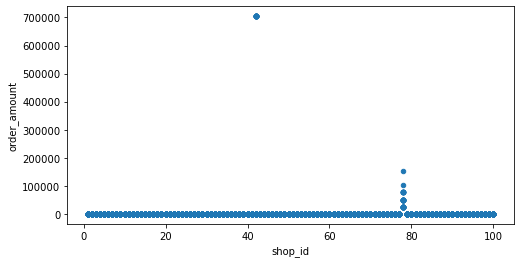

In [8]:
df.plot(kind='scatter', y='order_amount', x='shop_id', figsize=(8,4))
plt.show()

In [9]:
g=df.groupby('shop_id', as_index=False).sum()
g['gaov']=g.order_amount/g.total_items
g.sort_values('order_amount',ascending=False)

,shop_id,order_id,user_id,order_amount,total_items,gaov
41,42,124538,38688,11990176,34063,352.0
77,78,122499,39916,2263800,88,25725.0
88,89,172859,50618,23128,118,196.0
80,81,158452,49317,22656,128,177.0
5,6,143483,49818,22627,121,187.0
...,...,...,...,...,...,...
1,2,126448,47370,9588,102,94.0
99,100,94261,34093,8547,77,111.0
55,56,91134,31211,8073,69,117.0
31,32,96561,35986,7979,79,101.0


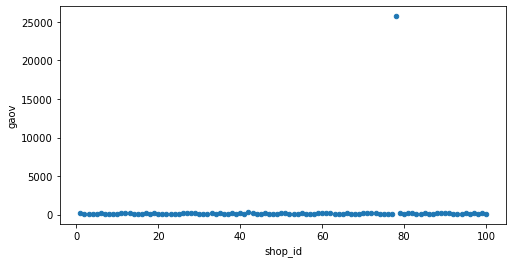

In [10]:
g.plot(kind='scatter', y='gaov', x='shop_id', figsize=(8,4))

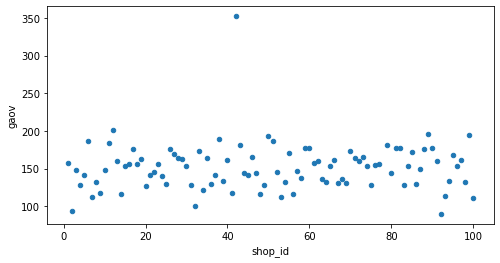

In [11]:
c=g.loc[g['shop_id']!= 78]
# c=g.loc[(g['shop_id']!= 42) & (g['shop_id']!= 78)]
c.plot(kind='scatter', y='gaov', x='shop_id', figsize=(8,4))

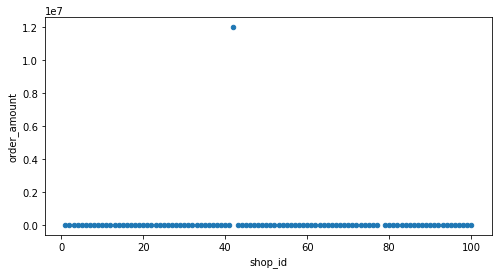

In [12]:
c.plot(kind='scatter', y='order_amount', x='shop_id', figsize=(8,4))

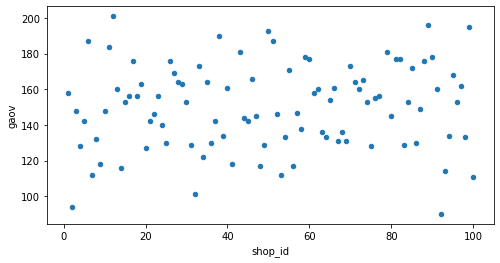

In [13]:
c=g.loc[(g['shop_id']!= 42) & (g['shop_id']!= 78)]
c.plot(kind='scatter', y='gaov', x='shop_id', figsize=(8,4))

In [14]:
c.sort_values('gaov',ascending=False)

,shop_id,order_id,user_id,order_amount,total_items,gaov
11,12,135437,44755,18693,93,201.0
88,89,172859,50618,23128,118,196.0
98,99,128844,45693,18330,94,195.0
49,50,95147,36718,17756,92,193.0
37,38,92390,29323,13680,72,190.0
...,...,...,...,...,...,...
52,53,162752,58381,14560,130,112.0
99,100,94261,34093,8547,77,111.0
31,32,96561,35986,7979,79,101.0
1,2,126448,47370,9588,102,94.0


In [15]:
shop_groups = df.groupby('shop_id').sum()
shop_groups.order_amount.sort_values(ascending=False)

shop_id
42     11990176
78      2263800
89        23128
81        22656
6         22627
         ...   
2          9588
100        8547
56         8073
32         7979
92         6840
Name: order_amount, Length: 100, dtype: int64

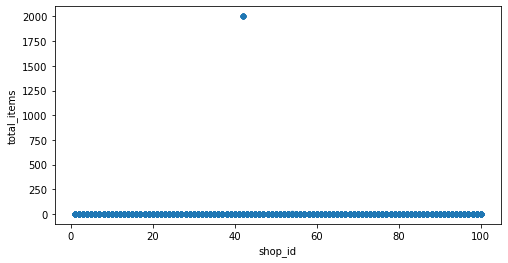

In [18]:
df.plot(kind='scatter', y='total_items', x='shop_id', figsize=(8,4))
plt.show()

In [19]:
# ORDERS LESS THAT 2000
# WE SEE THAT SHOP 42 HAS CONSTANTLY HAS 2000 ITEMS PER ORDER.

l2k=df[df['total_items']<2000]
print('Median:',l2k.total_items.median())
print(l2k.total_items.describe())

Median: 2.0
count    4983.00000
mean        1.99398
std         0.98318
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         8.00000
Name: total_items, dtype: float64


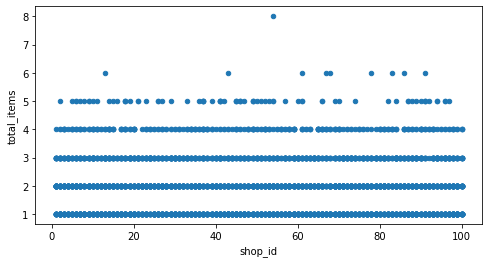

In [20]:
l2k.plot(kind='scatter', y='total_items', x='shop_id', figsize=(8,4))

In [21]:
# just like any metric AOV cannot be solely relied upon

In [22]:
group1 = df.groupby('shop_id').order_amount.sum().reset_index(name='total_order_amount')


In [23]:
# group1.plot(kind='scatter',x='shop_id', y='total_order_amount', ax=plt.gca(),figsize=(8,4)) # --> this si the same thing

In [24]:
total_items_count = df.total_items.value_counts().rename_axis('total_items').reset_index(name='count')
total_items_count

,total_items,count
0,2,1832
1,1,1830
2,3,941
3,4,293
4,5,77
5,2000,17
6,6,9
7,8,1


In [25]:
order_amount_count = df.groupby('total_items')['order_amount'].sum().rename_axis('total_items').reset_index(name='total')
# order_amount_count.sort_values('order_amount', ascending=False)
order_amount_count


,total_items,total
0,1,763777
1,2,1374394
2,3,1120803
3,4,277672
4,5,58470
5,6,161460
6,8,1064
7,2000,11968000


In [ ]:
            select count(Orders.ShipperID)
            from Orders
            where ShipperID is 1;